<a href="https://colab.research.google.com/github/Shiblu31/DL/blob/main/pro_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
import pathlib
#dataset_url = "/content/drive/MyDrive/DATASET/flower_photos"
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = "/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train"
data_dir = pathlib.Path(data_dir)

In [4]:
print(data_dir)

/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train


In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1272 files belonging to 7 classes.
Using 1018 files for training.


In [6]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1272 files belonging to 7 classes.
Using 254 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['1Hundred', '1Thousands', '2Hundred', '5Hundred', 'Fifty', 'Ten', 'Twenty']


/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train/Ten/10_127.jpg


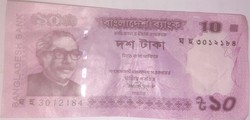

In [8]:
Ten = list(data_dir.glob('Ten/*'))
print(Ten[0])
PIL.Image.open(str(Ten[3]))

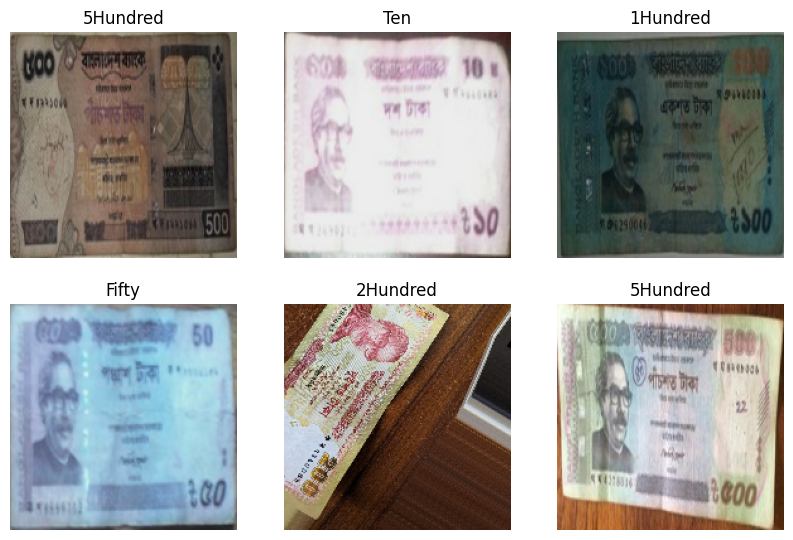

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [32]:

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [33]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_9 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_10 (ModuleW  (None, 512)               1049088   
 rapper)                                                         
                                                                 
 module_wrapper_11 (ModuleW  (None, 7)                 3591      
 rapper)                                                         
                                                                 
Total params: 24640391 (94.00 MB)
Trainable params: 1052679 (4.02 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [34]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [35]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
32/32 [==============================] - 313s 10s/step - loss: 0.9685 - accuracy: 0.6896 - val_loss: 0.2775 - val_accuracy: 0.9173
Epoch 2/10
32/32 [==============================] - 202s 6s/step - loss: 0.1617 - accuracy: 0.9558 - val_loss: 0.1463 - val_accuracy: 0.9528
Epoch 3/10
32/32 [==============================] - 196s 6s/step - loss: 0.0625 - accuracy: 0.9941 - val_loss: 0.0936 - val_accuracy: 0.9764
Epoch 4/10
32/32 [==============================] - 202s 6s/step - loss: 0.0314 - accuracy: 0.9990 - val_loss: 0.1229 - val_accuracy: 0.9528
Epoch 5/10
32/32 [==============================] - 196s 6s/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9528
Epoch 6/10
32/32 [==============================] - 244s 8s/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9646
Epoch 7/10
32/32 [==============================] - 241s 8s/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0731 - val_accuracy: 0.9646
Epoch 8/10
3

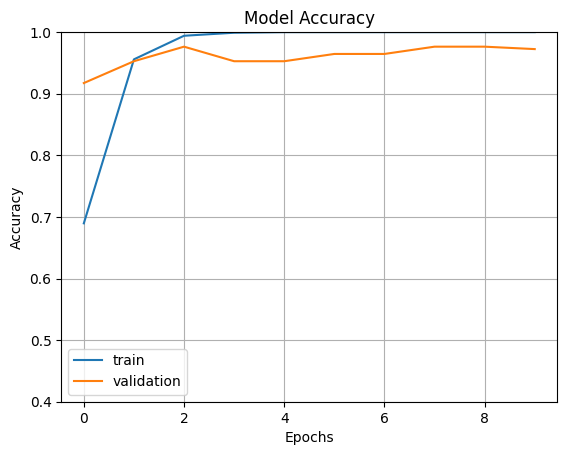

In [36]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

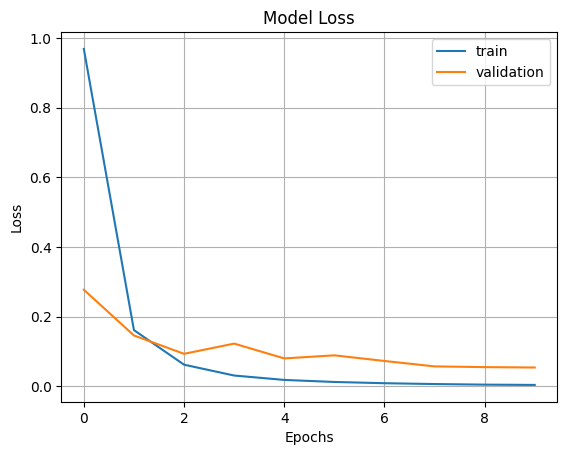

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [39]:
import cv2
image=cv2.imread(str(Ten[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [41]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 2s 2s/step
[[1.1574891e-07 8.0974445e-05 6.7828751e-08 8.2405299e-05 4.7640406e-06
  9.9954730e-01 2.8426803e-04]]


In [42]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Ten
